## Step 1: generate them

We generate gaussian-distributed pairs of random numbers with correlation coefficient rho

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
def generateWithCorrelation(rho=0, N=10000):
    scalefactor=2
    if rho > 1 or rho < -1:
        print("rho must be with in -1 and 1")
        return [], []
    randomGaussX = np.random.randn(N)*scalefactor 
    randomGaussZ = np.random.randn(N)*scalefactor
    # now make variable randomGaussY out of the above,
    # such that it is correlated to randomGaussX 
    # with correlation coefficient rho:
    randomGaussY = [z*sqrt(1.0 - rho**2) + rho*x for x,z in zip(randomGaussX, randomGaussZ)] 
    return randomGaussX, randomGaussY  
#scale factor to make sure correlation not coincidentally same as covariance  

## Step 2: plot them

In [3]:
def plotRandomGauss(data, size=6):
    plt.figure(figsize=(size,size))
    plt.scatter(data[0], data[1])
    plt.show()

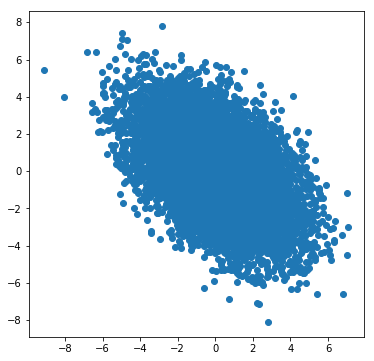

In [4]:
plotRandomGauss(generateWithCorrelation(-0.5, 10000))

## Step 3: Calculate covariance and correlation coefficient

In [5]:
def CovAndCorrCoeff(ListPair):
    sumx=0
    sumy=0
    sumxx=0
    sumyy=0
    sumxy=0
    N=0
    for x, y in zip(ListPair[0], ListPair[1]):
        sumx += x
        sumy += y
        sumxx += x**2
        sumyy += y**2
        sumxy += x*y
        N+=1
    meanx = sumx/N
    meany = sumy/N
    meanxx = sumxx/N
    meanyy = sumyy/N
    meanxy = sumxy/N
    
    Vx = meanxx - meanx**2
    sigmax = sqrt(Vx)
    Vy = meanyy - meany**2
    sigmay = sqrt(Vy)
    
    cov = meanxy - meanx*meany
    rho = cov/(sigmax*sigmay)
    
    return cov, rho

# Finally, put it all together and try it for different correlation coefficients

In [6]:
def GeneratePlotAndCalculate(rho=0, N=10000):
    data = generateWithCorrelation(rho, N)
    plotRandomGauss(data)
    cov, rho = CovAndCorrCoeff(data)
    print("Covariance = ", cov, ", correlation coefficient ", rho)

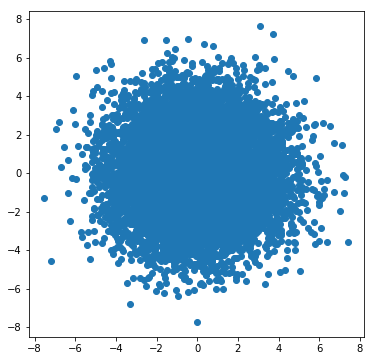

Covariance =  -0.0363929534243 , correlation coefficient  -0.0089907376142


In [7]:
GeneratePlotAndCalculate(0)

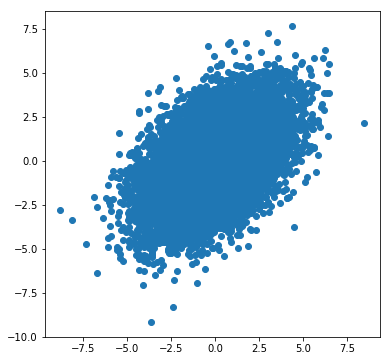

Covariance =  2.04960990354 , correlation coefficient  0.508005768657


In [8]:
GeneratePlotAndCalculate(0.5)

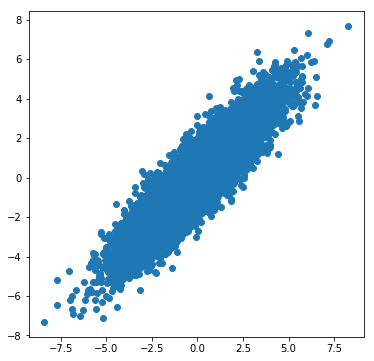

Covariance =  3.5971455416 , correlation coefficient  0.899626660992


In [9]:
GeneratePlotAndCalculate(0.9)

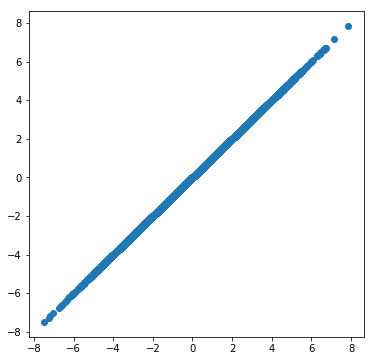

Covariance =  4.04670017017 , correlation coefficient  1.0


In [10]:
GeneratePlotAndCalculate(1)

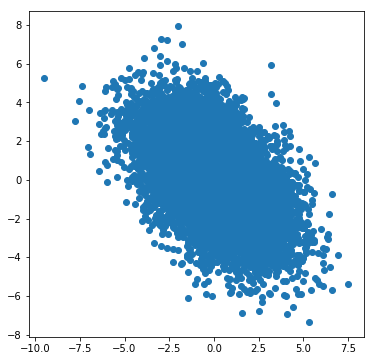

Covariance =  -1.90412663719 , correlation coefficient  -0.486128768345


In [11]:
GeneratePlotAndCalculate(-0.5)

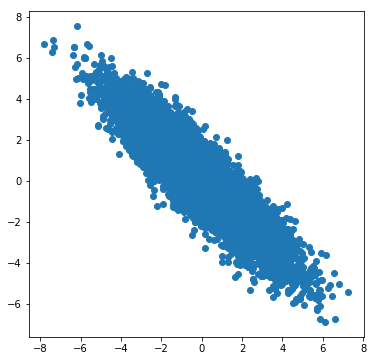

Covariance =  -3.52382027639 , correlation coefficient  -0.89889867897


In [12]:
GeneratePlotAndCalculate(-0.9)

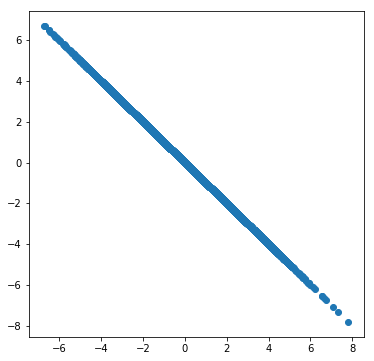

Covariance =  -3.96447881776 , correlation coefficient  -1.0


In [13]:
GeneratePlotAndCalculate(-1)